In [3]:
import cv2
import math
import pickle
import numpy as np

from evaluate_custom import CartoonImg
from so_evaluate import SoVisionImg

In [4]:
# choose which output to use here
EVAL_FILE = 'so_ourmodel.pkl'
with open(EVAL_FILE, 'rb') as pfile:
    results = pickle.load(pfile)

In [5]:
truepos = 0
falsepos = 0
falseneg = 0
for img in results:
    met = img.compute_metrics()
    truepos += met[0]
    falsepos += met[1]
    falseneg += met[2]

print(truepos, falsepos, falseneg)
print('Precision', truepos / (truepos + falsepos))
print('Recall', truepos / (truepos + falseneg))

1048 15015 868
Precision 0.06524310527298761
Recall 0.5469728601252609


In [6]:
dets = []
for img in results:
    _, _, _, pred_det, _ = img.compute_metrics(returnArrs=True)
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        dets.append((img.pred_conf[i], pred_det[i]))

dets = sorted(dets)
print(dets[-100:])

[(0.9999950991736518, True), (0.9999950991736518, True), (0.9999950991736518, True), (0.9999950991736518, True), (0.999995231628418, True), (0.999995231628418, True), (0.9999953640831841, True), (0.9999953640831841, True), (0.9999956289927164, False), (0.9999956289927164, True), (0.9999956289927164, True), (0.9999957614474826, False), (0.9999957614474826, True), (0.9999958939022489, True), (0.9999958939022489, True), (0.999996026357015, True), (0.999996026357015, True), (0.9999961588117812, True), (0.9999961588117812, True), (0.9999962912665473, True), (0.9999962912665473, True), (0.9999962912665473, True), (0.9999962912665473, True), (0.9999964237213135, True), (0.9999965561760796, True), (0.9999965561760796, True), (0.9999965561760796, True), (0.9999966886308458, True), (0.9999968210856119, False), (0.9999968210856119, True), (0.9999969535403781, False), (0.9999969535403781, True), (0.9999969535403781, True), (0.9999970859951444, True), (0.9999970859951444, True), (0.9999972184499105

In [7]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

1048 15015 868


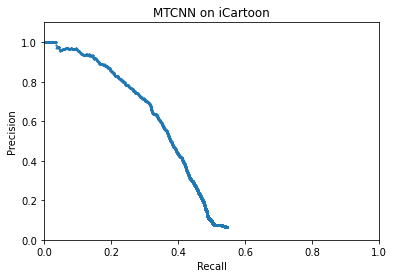

In [8]:
import matplotlib.pyplot as plt

plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1.1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on iCartoon')
plt.show()

In [9]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

AP: 0.35520053140451746


1000
[(523, 374, 58, 58), (467, 228, 72, 72), (162, 162, 142, 142), (438, 292, 113, 113)]
[0.99019073 0.99238484 0.99999139 0.99999815]
on_dataset/so_vision_test_set/img_60.jpg
(2, 2, 0)


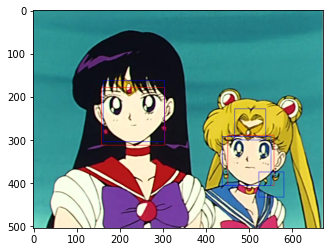

In [37]:
DATASET_DIR = '../dataset_generation/so_vision_dataset/so_vision_test_set/'
i = 0
for img in results:
    if(i%50==0):
        # img = results[60]
        imgname = img.path[-40:]
        img.path = DATASET_D,IR + imgname[imgname.index("img"):]
        out_bboxes = []
        out_confs = []
        idxs = np.array(img.pred_conf) > 0.99
        bboxes = np.array(img.pred_bboxes)
        confs = np.array(img.pred_conf)
        bboxes = bboxes[idxs]
        confs = confs[idxs]
        for bbox in range(len(bboxes)):
            out_bboxes.append((int(bboxes[bbox,0]), int(bboxes[bbox,1]), int(bboxes[bbox,2]), int(bboxes[bbox,3])))
            out_confs.append(confs[bbox])
        img.pred_bboxes = out_bboxes
        img.pred_conf = confs
        print(img.pred_bboxes)
        print(img.pred_conf)

        print(imgname)
        print(img.compute_metrics())
        img.draw()